This is a Colaboratory notebook designed to test the Mesoscopic Analysis Publication

For assistance in understanding, refer to the GradientCrescent Tutorial or Google's own tutorials
https://colab.research.google.com/github/google/eng-edu/blob/master/ml/pc/exercises/image_classification_part3.ipynb#scrollTo=IcYZPBS3bTAj

In [0]:


# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
#set randomness for reproducibility

!mkdir data

from numpy.random import seed
#seed(6) #1
from tensorflow import set_random_seed
#set_random_seed(5) #2

#

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os


#TRAINING SETS########################################

#Download the training dataset- 10psi
#!gdown https://drive.google.com/uc?id=1aJvpWIQ6G8fHwRCWRgrtKaKUQ8zaRLsK
#Download the training dataset- 5psi 
!gdown https://drive.google.com/uc?id=1Zxke5rZZOPRNAf0AmETNHUfbn6EPyeYi
  
#Downlaod FFHQ data

!gdown https://drive.google.com/uc?id=1ky465Gxe-7KYF5cheXgxHIkevJu7Ofbc


 

#Unzip all folders

!unzip real.zip -d data    
!unzip stylegan_05psi.zip -d data    

Downloading...
From: https://drive.google.com/uc?id=1Zxke5rZZOPRNAf0AmETNHUfbn6EPyeYi
To: /content/stylegan_05psi.zip
800MB [00:04, 167MB/s]
Downloading...
From: https://drive.google.com/uc?id=1ky465Gxe-7KYF5cheXgxHIkevJu7Ofbc
To: /content/real.zip
682MB [00:03, 187MB/s]
Archive:  real.zip
   creating: data/real/
  inflating: data/real/02000.png     
  inflating: data/real/02501.png     
  inflating: data/real/02502.png     
  inflating: data/real/02503.png     
  inflating: data/real/02504.png     
  inflating: data/real/02505.png     
  inflating: data/real/02506.png     
  inflating: data/real/02507.png     
  inflating: data/real/02508.png     
  inflating: data/real/02509.png     
  inflating: data/real/02510.png     
  inflating: data/real/02511.png     
  inflating: data/real/02512.png     
  inflating: data/real/02513.png     
  inflating: data/real/02514.png     
  inflating: data/real/02515.png     
  inflating: data/real/02516.png     
  inflating: data/real/02517.png     
 

In [0]:
print(os.listdir("/content/"))

#Print and remove zips once done


['.config', 'real.zip', 'stylegan_05psi.zip', 'data', 'sample_data']


In [0]:
#Cropping images into two sets of halves.
""" 

from matplotlib import pyplot as plt
import cv2

imagestorage = '../content/data'
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img, array_to_img, save_img
import tensorflow as tf
tf.enable_eager_execution()

fname = []
dirnames= []

for root,d_names,f_names in os.walk(imagestorage):
    #print(d_names)
    for f in f_names:
        fname.append(os.path.join(root, f))
    for d in d_names:
        dirnames.append(os.path.join(root, d))
#print(dirnames) 

#Iterate directory subfolder names

for dir in dirnames:
    files = os.listdir(dir)
    #Each subfolder has a differring number of files in it, so we iterate with an int tracker
    i=0
    for f in files:
        
        #First we generate the entire path within a directory to each individual file
        filename = os.path.join(dir,f)
        print("Generating quarter crops for file "+str(filename))
        #print(filename)
        #Next, we apply the quartering crop
        im = cv2.imread(filename,cv2.COLOR_BGR2RGB)
        print('Original Dimensions master',im.shape)
        h,w = im.shape[:2]
        midh = h/2
        midw = w/2
        crop1 = im[0:int(h),0:int(w/2)]
        crop2 = im[0:int(h),int(w/2):int(w)]
        crop3 = im[0:int(h/2),0:int(w)]
        crop4 = im[int(h/2):int(h),0:int(w)]
        
        print('Original Dimensions -crop1 ',crop1.shape)
        print('Original Dimensions -crop2 ',crop2.shape)
        print('Original Dimensions -crop3 ',crop3.shape)
        print('Original Dimensions -crop4 ',crop4.shape)
        
      
        resizecrop1= cv2.resize(crop1,(int(1024),int(1024)))
         
        resizecrop2= cv2.resize(crop2,(int(1024),int(1024)))
         
        resizecrop3= cv2.resize(crop3,(int(1024),int(1024)))
         
        resizecrop4= cv2.resize(crop4,(int(1024),int(1024)))
        
        print('Resize Dimensions -crop1 ',resizecrop1.shape)
        print('Resize Dimensions -crop2 ',resizecrop2.shape)
        print('Resize Dimensions -crop3 ',resizecrop3.shape)
        print('Resize Dimensions -crop4 ',resizecrop4.shape)
        
        filecrop1 = str(i)+'crop1.jpg'
        filecrop2=str(i)+'crop2.jpg'
        filecrop3 = str(i)+'crop3.jpg'
        filecrop4 = str(i)+'crop4.jpg'
        
      
        
        #Create the new filenames for the 
        filesave1=os.path.join(dir,filecrop1)
        filesave2=os.path.join(dir,filecrop2)
        filesave3=os.path.join(dir,filecrop3)
        filesave4=os.path.join(dir,filecrop4)
        
    
        #print(filesave1)
        save_img(filesave1, resizecrop1)
        save_img(filesave2, resizecrop2)
        save_img(filesave3, resizecrop3)
        save_img(filesave4, resizecrop4)
        
       
        #print(filesave)
        i=i+1
        
        
"""

' \n\nfrom matplotlib import pyplot as plt\nimport cv2\n\nimagestorage = \'../content/data\'\nfrom keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img, array_to_img, save_img\nimport tensorflow as tf\ntf.enable_eager_execution()\n\nfname = []\ndirnames= []\n\nfor root,d_names,f_names in os.walk(imagestorage):\n    #print(d_names)\n    for f in f_names:\n        fname.append(os.path.join(root, f))\n    for d in d_names:\n        dirnames.append(os.path.join(root, d))\n#print(dirnames) \n\n#Iterate directory subfolder names\n\nfor dir in dirnames:\n    files = os.listdir(dir)\n    #Each subfolder has a differring number of files in it, so we iterate with an int tracker\n    i=0\n    for f in files:\n        \n        #First we generate the entire path within a directory to each individual file\n        filename = os.path.join(dir,f)\n        print("Generating quarter crops for file "+str(filename))\n        #print(filename)\n        #Next, we apply the quartering 

Resnet Initialization

In [0]:
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model ,load_model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications.inception_v3 import InceptionV3
import tensorflow as tf


DATASET_PATH  = '/content/data'

IMAGE_SIZE    = (299, 299)
NUM_CLASSES   = 2
BATCH_SIZE    = 32  # try reducing batch size or freeze more layers if your GPU runs out of memory
FREEZE_LAYERS = 16 # freeze the first this many layers for training
NUM_EPOCHS    = 30
LEARNING_RATE = 0.002 #Slow learn rate as we are transfer training5e-5
DROP_OUT = .5



#Train datagen here is a preprocessor
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   rotation_range=50,
                                   featurewise_center = True,
                                   featurewise_std_normalization = True,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.25,
                                   zoom_range=0.1,
                                   zca_whitening = True,
                                   channel_shift_range = 20,
                                   horizontal_flip = True ,
                                   vertical_flip = True ,
                                   validation_split = 0.2,
                                   fill_mode='constant')

# test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
#                                    fill_mode='constant')

train_batches = train_datagen.flow_from_directory(DATASET_PATH,
                                                  target_size=IMAGE_SIZE,
                                                  shuffle=True,
                                                  batch_size=BATCH_SIZE,
                                                  subset = "training",
                                                  class_mode='binary'
                                                  
                                                  )

valid_batches = train_datagen.flow_from_directory(DATASET_PATH,
                                                  target_size=IMAGE_SIZE,
                                                  shuffle=True,
                                                  batch_size=BATCH_SIZE,
                                                  subset = "validation",
                                                  class_mode='binary'
                                                 
                                                 
                                                  )

#MAKE A TEST DATAGEN linking to separate path
#train_batches

#https://medium.com/@vijayabhaskar96/tutorial-image-classification-with-keras-flow-from-directory-and-generators-95f75ebe5720

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:341: UserWarning: This ImageDataGenerator specifies `zca_whitening` which overrides setting of`featurewise_std_normalization`.
  warnings.warn('This ImageDataGenerator specifies '


Found 800 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


Layer Modification at upper layer of Resnet

In [0]:
# build our classifier model based on pre-trained InceptionResNetV2:
# 1. we don't include the top (fully connected) layers of InceptionResNetV2
# 2. we add a DropOut layer followed by a Dense (fully connected)
#    layer which generates softmax class score for each class
# 3. we compile the final model using an Adam optimizer, with a
#    low learning rate (since we are 'fine-tuning')

#If you need help then https://gist.github.com/fchollet/7eb39b44eb9e16e59632d25fb3119975

#############main portion for vgg16 only##############
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D,BatchNormalization,Conv2D,MaxPooling2D,Dropout,Flatten,LeakyReLU,Reshape, Concatenate
from tensorflow.keras import backend as K

from tensorflow.keras.layers import Input
""" 
net = InceptionV3(include_top=False,
                        weights='imagenet',
                        input_tensor=None,
                        input_shape=(299,299,3))

# add a global spatial average pooling layer
x = net.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)
# add dropout
x = Dropout(0.5)(x)
# one fully connected layer more
x = Dense(256, activation='relu')(x)
# add dropout
x = Dropout(0.5)(x)
# one fully connected layer more
x = Dense(32, activation='relu')(x)
# and a logistic layer --
predictions = Dense(1, activation='sigmoid')(x)
model = Model(net.input, predictions)

for layer in net.layers[ :90]:
    layer.trainable = False
model.compile(optimizer=Adam(lr=LEARNING_RATE),
                  loss='binary_crossentropy', metrics=['accuracy'])

#   print(net_final.summary())

"""

" \nnet = InceptionV3(include_top=False,\n                        weights='imagenet',\n                        input_tensor=None,\n                        input_shape=(299,299,3))\n\n# add a global spatial average pooling layer\nx = net.output\nx = GlobalAveragePooling2D()(x)\n# let's add a fully-connected layer\nx = Dense(1024, activation='relu')(x)\n# add dropout\nx = Dropout(0.5)(x)\n# one fully connected layer more\nx = Dense(256, activation='relu')(x)\n# add dropout\nx = Dropout(0.5)(x)\n# one fully connected layer more\nx = Dense(32, activation='relu')(x)\n# and a logistic layer --\npredictions = Dense(1, activation='sigmoid')(x)\nmodel = Model(net.input, predictions)\n\nfor layer in net.layers[ :90]:\n    layer.trainable = False\nmodel.compile(optimizer=Adam(lr=LEARNING_RATE),\n                  loss='binary_crossentropy', metrics=['accuracy'])\n\n#   print(net_final.summary())\n\n"

In [0]:
#Meso4 model from mesoscopic analysis.  Input names changed because its easier for feature visualization

def InceptionLayer(a, b, c, d):
  def func(x):
    x1 = Conv2D(a, (1, 1), padding='same', activation='relu')(x)
            
    x2 = Conv2D(b, (1, 1), padding='same', activation='relu')(x)
    x2 = Conv2D(b, (3, 3), padding='same', activation='relu')(x2)
            
    x3 = Conv2D(c, (1, 1), padding='same', activation='relu')(x)
    x3 = Conv2D(c, (3, 3), dilation_rate = 2, strides = 1, padding='same', activation='relu')(x3)
            
    x4 = Conv2D(d, (1, 1), padding='same', activation='relu')(x)
    x4 = Conv2D(d, (3, 3), dilation_rate = 3, strides = 1, padding='same', activation='relu')(x4)

    y = Concatenate(axis = -1)([x1, x2, x3, x4])
           
    return y
  return func
      
      
x = Input(shape = (299, 299, 3))
        
x1 = InceptionLayer(1, 4, 4, 2)(x)
x1 = BatchNormalization()(x1)
x1 = MaxPooling2D(pool_size=(2, 2), padding='same')(x1)
       
x2 = InceptionLayer(2, 4, 4, 2)(x1)
x2 = BatchNormalization()(x2)
x2 = MaxPooling2D(pool_size=(2, 2), padding='same')(x2)        
        
x3 = Conv2D(16, (5, 5), padding='same', activation = 'relu')(x2)
x3 = BatchNormalization()(x3)
x3 = MaxPooling2D(pool_size=(2, 2), padding='same')(x3)
        
x4 = Conv2D(16, (5, 5), padding='same', activation = 'relu')(x3)
x4 = BatchNormalization()(x4)
x4 = MaxPooling2D(pool_size=(4, 4), padding='same')(x4)
        
y = Flatten()(x4)
y = Dropout(0.5)(y)
y = Dense(16)(y)
y = LeakyReLU(alpha=0.1)(y)
y = Dropout(0.5)(y)
y = Dense(1, activation = 'sigmoid')(y)  

model = Model(inputs = x, outputs = y)
  
  

model.compile(optimizer=Adam(lr=LEARNING_RATE),
                  loss='binary_crossentropy', metrics=['accuracy'])


W0816 11:19:43.283165 140307508402048 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0816 11:19:44.224993 140307508402048 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
print(model.summary())

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 299, 299, 4)  16          input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 299, 299, 4)  16          input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_5 (Conv2D)               (None, 299, 299, 2)  8           input_1[0][0]                    
______________________________________________________________________________________________

Training

In [0]:
#FIT MODEL
result=model.fit_generator(train_batches,
                        steps_per_epoch = 100,
                        validation_data = valid_batches,
                        validation_steps =50,
                        epochs = NUM_EPOCHS,
#                         
                       )

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:735: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/30


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:735: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


100/100 [==============================] - 309s 3s/step - loss: 0.8666 - acc: 0.5500 - val_loss: 1.5435 - val_acc: 0.5007
Epoch 2/30
100/100 [==============================] - 289s 3s/step - loss: 0.7324 - acc: 0.5825 - val_loss: 0.9377 - val_acc: 0.5000
Epoch 3/30
100/100 [==============================] - 289s 3s/step - loss: 0.6839 - acc: 0.6034 - val_loss: 0.7710 - val_acc: 0.5042
Epoch 4/30
100/100 [==============================] - 286s 3s/step - loss: 0.6584 - acc: 0.6303 - val_loss: 0.8239 - val_acc: 0.4923
Epoch 5/30
100/100 [==============================] - 285s 3s/step - loss: 0.6387 - acc: 0.6466 - val_loss: 0.7916 - val_acc: 0.5000
Epoch 6/30
100/100 [==============================] - 287s 3s/step - loss: 0.6374 - acc: 0.6469 - val_loss: 0.6896 - val_acc: 0.5663
Epoch 7/30
100/100 [==============================] - 290s 3s/step - loss: 0.6285 - acc: 0.6681 - val_loss: 0.6788 - val_acc: 0.6194
Epoch 8/30
100/100 [==============================] - 293s 3s/step - loss: 0.607

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:735: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


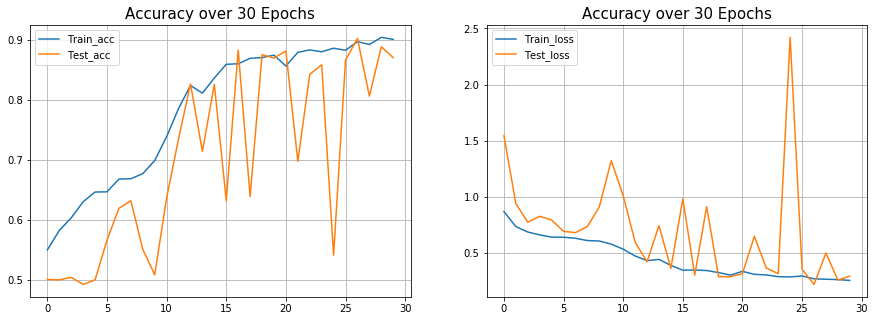

In [0]:
import matplotlib.pyplot as plt


def plot_acc_loss(result, epochs):
    acc = result.history['acc']
    loss = result.history['loss']
    val_acc = result.history['val_acc']
    val_loss = result.history['val_loss']
    plt.figure(figsize=(15, 5))
    plt.subplot(121)
    plt.plot(range(epochs), acc, label='Train_acc')
    plt.plot(range(epochs), val_acc, label='Test_acc')
    plt.title('Accuracy over ' + str(epochs) + ' Epochs', size=15)
    plt.legend()
    plt.grid(True)
    plt.subplot(122)
    plt.plot(range(epochs), loss, label='Train_loss')
    plt.plot(range(epochs), val_loss, label='Test_loss')
    plt.title('Loss over ' + str(epochs) + ' Epochs', size=15)
    plt.legend()
    plt.grid(True)
    plt.show()
    
plot_acc_loss(result, 30)

#model.save('stylgen_recog_mesoincep.h5')

In [0]:
model.compile(optimizer=Adam(lr=0.0002),
                  loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
result=model.fit_generator(train_batches,
                        steps_per_epoch = 100,
                        validation_data = valid_batches,
                        validation_steps =50,
                        epochs = 20,
#                         
                       )

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:735: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/20


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:735: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


100/100 [==============================] - 326s 3s/step - loss: 0.2178 - acc: 0.9159 - val_loss: 0.3224 - val_acc: 0.8673
Epoch 2/20
100/100 [==============================] - 298s 3s/step - loss: 0.2031 - acc: 0.9231 - val_loss: 0.2545 - val_acc: 0.8890
Epoch 3/20
100/100 [==============================] - 299s 3s/step - loss: 0.1999 - acc: 0.9228 - val_loss: 0.2231 - val_acc: 0.9022
Epoch 4/20
100/100 [==============================] - 295s 3s/step - loss: 0.1962 - acc: 0.9266 - val_loss: 0.2333 - val_acc: 0.8987
Epoch 5/20
100/100 [==============================] - 295s 3s/step - loss: 0.1912 - acc: 0.9206 - val_loss: 0.2334 - val_acc: 0.8939
Epoch 6/20
100/100 [==============================] - 292s 3s/step - loss: 0.1994 - acc: 0.9219 - val_loss: 0.2256 - val_acc: 0.9029
Epoch 7/20
100/100 [==============================] - 292s 3s/step - loss: 0.1826 - acc: 0.9275 - val_loss: 0.2862 - val_acc: 0.8792
Epoch 8/20
100/100 [==============================] - 291s 3s/step - loss: 0.183

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:735: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


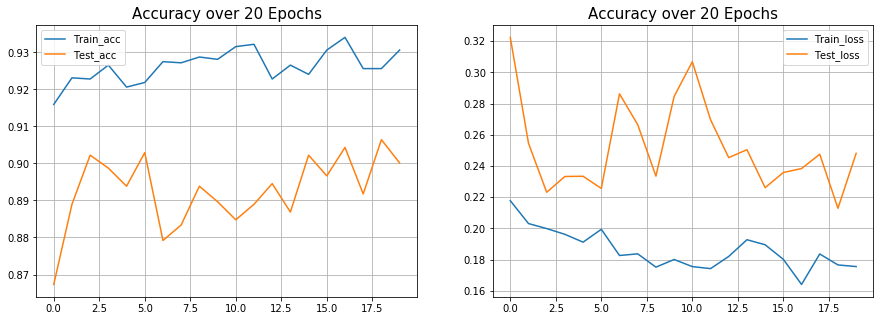

In [0]:
def plot_acc_loss(result, epochs):
    acc = result.history['acc']
    loss = result.history['loss']
    val_acc = result.history['val_acc']
    val_loss = result.history['val_loss']
    plt.figure(figsize=(15, 5))
    plt.subplot(121)
    plt.plot(range(epochs), acc, label='Train_acc')
    plt.plot(range(epochs), val_acc, label='Test_acc')
    plt.title('Accuracy over ' + str(epochs) + ' Epochs', size=15)
    plt.legend()
    plt.grid(True)
    plt.subplot(122)
    plt.plot(range(epochs), loss, label='Train_loss')
    plt.plot(range(epochs), val_loss, label='Test_loss')
    plt.title('Accuracy over ' + str(epochs) + ' Epochs', size=15)
    plt.legend()
    plt.grid(True)
    plt.show()
    
plot_acc_loss(result, 20)

model.save('stylgen_recog_Incepmeso4_10.h5')

In [0]:
# save trained weights
# net_final.save(WEIGHTS_FINAL)
x = net_final.evaluate_generator(valid_batches,
                           steps = np.ceil(len(valid_batches) / BATCH_SIZE),
                           use_multiprocessing = True,
                           verbose = 1
                           )


print('Test loss:' , x[0])
print('Test accuracy:',x[1])

#net_final.save('stylgen_recog_styled_10.h5')

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:735: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


NameError: ignored

Predict

In [0]:
#Evaluate on test dataset - TODO: actually import the test dataset define TESTdir, we also have to name all of it as CAR

""" 
eval_generator = train_datagen.flow_from_directory(
        test_dir,target_size=IMAGE_SIZE,
        batch_size=20,
        class_mode='categorical')
eval_generator.reset()    
pred = net_final.predict_generator(eval_generator,1000,verbose=1)
print("Predictions finished")


#Map the predictions to the training classes
#First, take max prediction class
predicted_class_indices=np.argmax(pred,axis=1)

#Map it to train generataor
labels = (train_batches.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]
"""

Save

In [0]:
#Save results
""" 
filenames=eval_generator.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions})
results.to_csv("finalresultsVGG16_stylegan.csv",index=False)
"""